In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

from scipy.stats import entropy

from sklearn.manifold import TSNE
import plotly.express as px

from gtda.time_series import embedding, TakensEmbedding
from sklearn.cluster import AgglomerativeClustering
import yfinance as yf

plt.style.use('ggplot')

In [2]:
stock = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
stock = stock.iloc[:1000]
stock = stock[['Close']]

[*********************100%%**********************]  1 of 1 completed


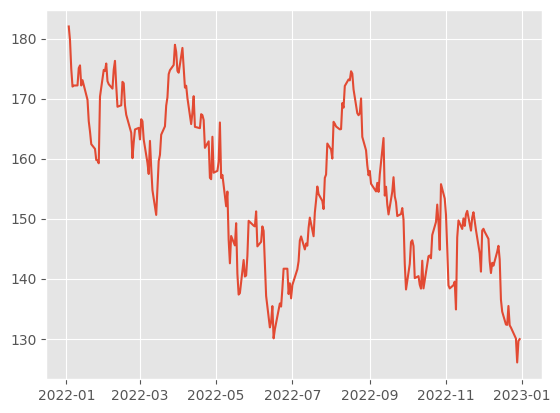

In [3]:
plt.plot(stock)

plt.show()

In [4]:
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    stock, 100, 10, stride=1
)
phase_traj = TakensEmbedding(optimal_time_delay, 3).fit_transform(stock['Close'].values.reshape(1, -1))[0]
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
clustering.fit(phase_traj)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

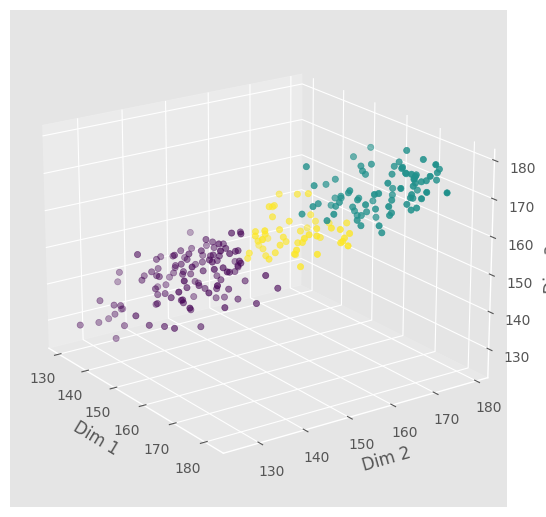

In [5]:
phase_traj_w_cl = pd.concat([pd.DataFrame(phase_traj, columns=['x', 'y', 'z']), pd.DataFrame(clustering.labels_.reshape(-1, 1), columns=['cluster'])], axis=1)
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.scatter(phase_traj_w_cl['x'], phase_traj_w_cl['y'], phase_traj_w_cl['z'], c=phase_traj_w_cl['cluster'])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

In [11]:
reconstruct_data = np.concatenate([phase_traj_w_cl['x'].values, phase_traj_w_cl['y'][-98:].values, phase_traj_w_cl['z'][-98:].values])
new_cl = np.concatenate([phase_traj_w_cl.cluster.values, phase_traj_w_cl.cluster.values[-98:], phase_traj_w_cl.cluster.values[-98:]])
df = pd.DataFrame(np.array([reconstruct_data, new_cl]).T, columns=['data', 'cl'])

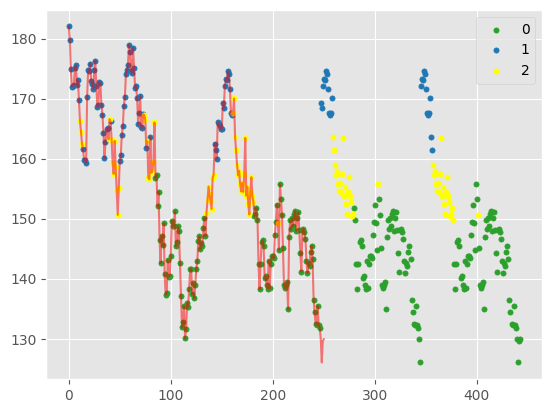

In [16]:
plt.plot(stock.reset_index(drop=True), alpha=0.5, color='red')
col_array = ['tab:green', 'tab:blue', 'yellow']

for i in range(3):
    plt.scatter(df[df['cl'] == i]['data'].index, df[df['cl'] == i]['data'], c=col_array[i], s=14, label=i)

plt.legend()
plt.show()